In [ ]:
!pip install scikit-survival==0.22.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 39.9 MB/s eta 0:00:00


In [ ]:
pip install -U giotto-tda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.6/554.6 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.7 MB/s eta 0:00:00


In [ ]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4032 sha256=b3b251624523d3b4712cd5d7fbccb6292476003c7a44bd4b412d7563aff5de61
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
pip install gudhi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 42.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import gudhi as gd
from gtda.plotting import plot_diagram
from gtda.diagrams import PersistenceEntropy
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix
from scipy.spatial import distance_matrix
from gtda.graphs import GraphGeodesicDistance
from gtda.homology import VietorisRipsPersistence, SparseRipsPersistence, FlagserPersistence
from igraph import Graph, plot
from IPython.display import SVG, display
from sklearn import preprocessing
import matplotlib.pyplot as plt
from lifelines import LogLogisticAFTFitter, LogNormalAFTFitter, WeibullAFTFitter
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
from sklearn.inspection import permutation_importance
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
data = pd.read_excel("/content/dataset for correlated data.xlsx", sheet_name='Sheet1')
data

,Province,Region,longitude(y),lattitude(x),Date,Day-D,time,cumulative covid on the day-D,population,proportion of over 50 age,...,Proporsi Populasi Yang Memiliki Fasilitas Cuci Tangan Dengan Sabun Dan Air Menurut Provinsi (Persen),NB,average_distance,nearest_time_nb,retail_and_recreation,grocery_and_pharmacy,parks_percent,transit_stations,workplaces_percent,residential_percent
0,DKI Jakarta,Kemang,-6.27,106.90,2020-03-02,1,0,2,5267.8,19.29,...,73.18,NaN,NaN,NaN,0.43,4.29,-0.36,3.14,2.36,0.93
1,Jawa Barat,Depok,-6.38,106.83,2020-03-02,1,0,2,25111.2,20.35,...,76.82,NaN,NaN,NaN,0.00,3.00,-3.07,2.21,3.00,0.57
2,Banten,Serang,-6.12,106.15,2020-03-08,7,6,6,6557.9,18.43,...,74.19,NaN,NaN,NaN,4.00,6.36,9.29,0.86,4.71,0.57
3,Jawa Tengah,Surakarta,-7.57,110.75,2020-03-09,7,6,19,17237.3,25.86,...,81.22,NaN,NaN,NaN,-0.71,1.21,-9.00,0.71,3.29,0.86
4,Bali,Denpasar,-8.25,115.08,2020-03-10,9,8,25,2221.4,23.69,...,88.33,NaN,NaN,NaN,-3.79,-0.36,-10.50,-11.50,-6.50,2.50
5,Kalimantan Barat,Pontianak,0.00,109.33,2020-03-10,9,8,25,2591.4,18.38,...,71.31,NaN,NaN,NaN,-2.86,-1.57,-2.57,-10.07,6.07,0.79
6,Daerah Istimewa Yogyakarta,Yogyakarta,-7.50,110.50,2020-03-13,12,11,60,1935.4,27.23,...,80.89,NaN,NaN,NaN,2.14,3.50,-14.64,-18.29,4.93,0.79
7,Sulawesi Utara,Manado,1.50,124.83,2020-03-14,13,12,83,1279.6,24.56,...,83.12,NaN,NaN,NaN,1.71,5.64,-8.36,7.50,6.71,0.29
8,Jawa Timur,Surabaya,-7.15,112.50,2020-03-17,16,15,156,19722.2,26.95,...,77.08,NaN,NaN,NaN,0.71,4.71,-5.29,-1.79,2.57,1.14
9,Kepulauan Riau,Tanjung Pinang,0.08,104.25,2020-03-17,16,15,156,1179.0,13.76,...,74.49,NaN,NaN,NaN,-0.50,4.93,1.36,-11.00,4.36,1.57


In [ ]:
#data_2 = pd.read_excel("/content/data survival EXP 1-2.xlsx", sheet_name='Sheet3')
#data_2

In [ ]:
data_longitudinal = pd.read_excel("/content/dataset of longitudinal data.xlsx", sheet_name='Sheet1')
data_longitudinal

,Province,Region,longitude(y),lattitude(x),Date_event,Date_covariate,Day-D,time,cumulative_cov,NB,average_distance,nearest_time_nb,retail_and_recreation,grocery_and_pharmacy,parks_percent,transit_stations,workplaces_percent,residential_percent
0,DKI Jakarta,Kemang,-6.27,106.9,2020-03-02,2020-02-17,1,-14,0,NaN,NaN,NaN,-2,-1,-6,2.0,4,1
1,DKI Jakarta,Kemang,-6.27,106.9,2020-03-02,2020-02-18,1,-13,0,NaN,NaN,NaN,-1,1,-3,3.0,3,1
2,DKI Jakarta,Kemang,-6.27,106.9,2020-03-02,2020-02-19,1,-12,0,NaN,NaN,NaN,-1,-3,-2,3.0,3,1
3,DKI Jakarta,Kemang,-6.27,106.9,2020-03-02,2020-02-20,1,-11,0,NaN,NaN,NaN,-2,-1,-2,5.0,2,1
4,DKI Jakarta,Kemang,-6.27,106.9,2020-03-02,2020-02-21,1,-10,0,NaN,NaN,NaN,6,4,18,5.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Nusa Tenggara Timur,Kupang,-10.17,123.7,2020-04-09,2020-04-04,38,-5,2092,NaN,NaN,NaN,-29,-14,-18,-35.0,-15,8
472,Nusa Tenggara Timur,Kupang,-10.17,123.7,2020-04-09,2020-04-05,38,-4,2273,NaN,NaN,NaN,-36,-20,-19,-38.0,-7,8
473,Nusa Tenggara Timur,Kupang,-10.17,123.7,2020-04-09,2020-04-06,38,-3,2491,NaN,NaN,NaN,-28,-13,-16,-36.0,-25,12
474,Nusa Tenggara Timur,Kupang,-10.17,123.7,2020-04-09,2020-04-07,38,-2,2738,NaN,NaN,NaN,-27,-14,-14,-34.0,-26,11


In [ ]:
x = data['lattitude(x)']
y = data['longitude(y)']
#cum = data['cumulative covid on the day-D']
x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))
#day = data['Day-D']
day = data['time']
day_norm = (day-min(day))/(max(day)-min(day))

data_list = []
for i in range(len(day)):
  coord = [x[i], y[i], day_norm[i]]
  data_list.append(np.array(coord))

data_array_1 = np.array([data_list])
data_array_2 = np.array(data_list)

## Persistent Homology for Correlated Data

108


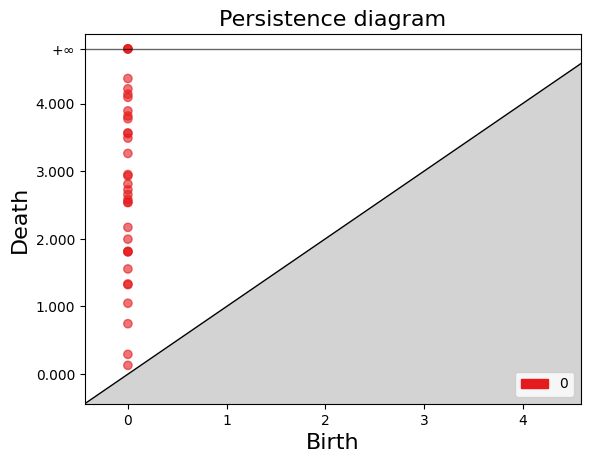

In [ ]:
def sim_complex(data, r, dim):
  skeleton = gd.RipsComplex(points = data, max_edge_length = r)
  Rips_simplex_tree_sample = skeleton.create_simplex_tree(max_dimension = dim)
  rips_generator = Rips_simplex_tree_sample.get_filtration()
  rips_list = list(rips_generator)
  rip2_list = []
  for r in rips_list[:] :
    #print(r)
    if len(r[0])>1:
    #if day[r[0][0]]!=day[r[0][1]]:
      rip2_list.append(r[0])
      #print(r)
  print(len(rip2_list))
  Barcode_gudhi = Rips_simplex_tree_sample.persistence()
  gd.plot_persistence_diagram(Barcode_gudhi)
  return rip2_list

sim_list = sim_complex(data_array_2, r=6, dim=1)

In [ ]:
M = []
for i, j in enumerate(data['lattitude(x)']):
  co = [data['lattitude(x)'][i], data['longitude(y)'][i]]
  M.append(co)

dis = distance_matrix(M, M)

In [ ]:
#Preprocessing of NB

nb_prov = {x: [] for x in data.index}
nb_prov_long = {x: [] for x in data_longitudinal.index}
nb_list = []
nb_list_long = []
nb_total = []
nb_total_long = []
aver_dis = []
aver_dis_long = []
nearest_time = []
nearest_time_long = []
for [i, j] in sim_list:
  if data['Day-D'][i]!=data['Day-D'][j]:
    nb_prov[j].append(i)
    l = (j+1)*14
    k = l-(data['Day-D'][j]-data['Day-D'][i])
    for p in range(k, l):
      nb_prov_long[p].append(i)

for i in nb_prov:
  nb_list.append(nb_prov[i])
  nb_total.append(len(nb_prov[i]))
  if len(nb_prov[i])==0:
    nearest_time.append(0)
    aver_dis.append(0)
  else:
    d=0
    for n in nb_prov[i]:
      d+= dis[i][n]
    aver_dis.append(d/len(nb_prov[i]))
    a = max(nb_prov[i])
    nearest_time.append(data['Day-D'][a])

for i in nb_prov_long:
  nb_list_long.append(nb_prov_long[i])
  nb_total_long.append(len(nb_prov_long[i]))
  if len(nb_prov_long[i])==0:
    nearest_time_long.append(0)
    aver_dis_long.append(0)
  else:
    d=0
    for n in nb_prov_long[i]:
      b = i//14
      d+= dis[b][n]
    aver_dis_long.append(d/len(nb_prov_long[i]))
    a = max(nb_prov_long[i])
    nearest_time_long.append(data['Day-D'][a])

m = max(aver_dis)
for i, j in enumerate(aver_dis):
  if j==0:
    aver_dis[i]=m+1
for i, j in enumerate(aver_dis_long):
  if j==0:
    aver_dis_long[i]=m+1
#print(aver_dis)

In [ ]:
data['NB']=nb_list
data['NB_total'] = nb_total
data['nearest_time_nb'] = nearest_time
data['average_distance'] = aver_dis
data['event']= [1]*len(data.index)
data

,Province,Region,longitude(y),lattitude(x),Date,Day-D,time,cumulative covid on the day-D,population,proportion of over 50 age,...,average_distance,nearest_time_nb,retail_and_recreation,grocery_and_pharmacy,parks_percent,transit_stations,workplaces_percent,residential_percent,NB_total,event
0,DKI Jakarta,Kemang,-6.27,106.90,2020-03-02,1,0,2,5267.8,19.29,...,6.950034,0,0.43,4.29,-0.36,3.14,2.36,0.93,0,1
1,Jawa Barat,Depok,-6.38,106.83,2020-03-02,1,0,2,25111.2,20.35,...,6.950034,0,0.00,3.00,-3.07,2.21,3.00,0.57,0,1
2,Banten,Serang,-6.12,106.15,2020-03-08,7,6,6,6557.9,18.43,...,0.746432,1,4.00,6.36,9.29,0.86,4.71,0.57,2,1
3,Jawa Tengah,Surakarta,-7.57,110.75,2020-03-09,7,6,19,17237.3,25.86,...,4.080101,1,-0.71,1.21,-9.00,0.71,3.29,0.86,2,1
4,Bali,Denpasar,-8.25,115.08,2020-03-10,9,8,25,2221.4,23.69,...,4.383070,7,-3.79,-0.36,-10.50,-11.50,-6.50,2.50,1,1
5,Kalimantan Barat,Pontianak,0.00,109.33,2020-03-10,9,8,25,2591.4,18.38,...,6.950034,0,-2.86,-1.57,-2.57,-10.07,6.07,0.79,0,1
6,Daerah Istimewa Yogyakarta,Yogyakarta,-7.50,110.50,2020-03-13,12,11,60,1935.4,27.23,...,3.421138,9,2.14,3.50,-14.64,-18.29,4.93,0.79,5,1
7,Sulawesi Utara,Manado,1.50,124.83,2020-03-14,13,12,83,1279.6,24.56,...,6.950034,0,1.71,5.64,-8.36,7.50,6.71,0.29,0,1
8,Jawa Timur,Surabaya,-7.15,112.50,2020-03-17,16,15,156,19722.2,26.95,...,3.605113,12,0.71,4.71,-5.29,-1.79,2.57,1.14,5,1
9,Kepulauan Riau,Tanjung Pinang,0.08,104.25,2020-03-17,16,15,156,1179.0,13.76,...,5.080630,9,-0.50,4.93,1.36,-11.00,4.36,1.57,1,1


In [ ]:
data_longitudinal['NB']=nb_list_long
data_longitudinal['NB_total'] = nb_total_long
data_longitudinal['nearest_time_nb'] = nearest_time_long
data_longitudinal['average_distance'] = aver_dis_long
data_longitudinal['event']= [1]*len(data_longitudinal.index)
data_longitudinal[112:126]

,Province,Region,longitude(y),lattitude(x),Date_event,Date_covariate,Day-D,time,cumulative_cov,NB,average_distance,nearest_time_nb,retail_and_recreation,grocery_and_pharmacy,parks_percent,transit_stations,workplaces_percent,residential_percent,NB_total,event
112,Jawa Timur,Surabaya,-7.15,112.5,2020-03-17,2020-03-03,16,-14,2,"[0, 1]",5.695383,1,0,6,-5,-4.0,5,1,2,1
113,Jawa Timur,Surabaya,-7.15,112.5,2020-03-17,2020-03-04,16,-13,2,"[0, 1]",5.695383,1,5,11,-5,-2.0,5,0,2,1
114,Jawa Timur,Surabaya,-7.15,112.5,2020-03-17,2020-03-05,16,-12,2,"[0, 1]",5.695383,1,3,8,1,-1.0,5,0,2,1
115,Jawa Timur,Surabaya,-7.15,112.5,2020-03-17,2020-03-06,16,-11,4,"[0, 1]",5.695383,1,-4,-1,-13,2.0,4,2,2,1
116,Jawa Timur,Surabaya,-7.15,112.5,2020-03-17,2020-03-07,16,-10,4,"[0, 1]",5.695383,1,-3,0,-12,-2.0,4,1,2,1
117,Jawa Timur,Surabaya,-7.15,112.5,2020-03-17,2020-03-08,16,-9,6,"[3, 0, 1]",4.396820,7,3,6,-7,1.0,3,0,3,1
118,Jawa Timur,Surabaya,-7.15,112.5,2020-03-17,2020-03-09,16,-8,19,"[3, 0, 1]",4.396820,7,1,1,-4,-1.0,5,1,3,1
119,Jawa Timur,Surabaya,-7.15,112.5,2020-03-17,2020-03-10,16,-7,27,"[3, 4, 0, 1]",3.998793,9,5,8,3,-1.0,5,0,4,1
120,Jawa Timur,Surabaya,-7.15,112.5,2020-03-17,2020-03-11,16,-6,34,"[3, 4, 0, 1]",3.998793,9,6,8,-1,0.0,5,0,4,1
121,Jawa Timur,Surabaya,-7.15,112.5,2020-03-17,2020-03-12,16,-5,34,"[3, 4, 0, 1]",3.998793,9,4,5,3,-2.0,5,0,4,1


In [ ]:
data.to_csv('data regular.csv')

## Survival Analysis Comparison between with and without Object Relation

<lifelines.WeibullAFTFitter: fitted with 34 total observations, 0 right-censored observations>
             duration col = 'Day-D'
   number of observations = 34
number of events observed = 34
           log-likelihood = -106.30
         time fit was run = 2024-07-30 19:39:57 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                     
lambda_ NB_total               -0.02       0.98       0.02            -0.06             0.03                 0.94                 1.03
        average_distance        0.07       1.07       0.05            -0.04             0.17                 0.96                 1.19
        grocery_and_pharmacy   -0.02       0.98       0.02            -0.06             0.03                 0.94                 1.03
        nearest_time_nb         0.03       1.03       0.01             0.01             0.04                 1.01                 1.05
        parks_percent           0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
        residential_percent     0.19       1.20       0.12            -0.05             0.42                 0.95                 1.53
        retail_and_recreation  -0.00       1.00       0.03            -0.06             0.05                 0.94                 1.05
        transit_stations       -0.00       1.00       0.01            -0.03             0.02                 0.97                 1.02
        workplaces_percent      0.06       1.06       0.04            -0.02             0.13                 0.98                 1.14
        Intercept               1.85       6.37       0.38             1.10             2.61                 3.00                13.54
rho_    Intercept               1.40       4.06       0.15             1.10             1.70                 3.00                 5.49

                                cmp to     z      p   -log2(p)
param   covariate                                             
lambda_ NB_total                  0.00 -0.75   0.45       1.14
        average_distance          0.00  1.20   0.23       2.11
        grocery_and_pharmacy      0.00 -0.78   0.43       1.21
        nearest_time_nb           0.00  2.86 <0.005       7.86
        parks_percent             0.00  0.44   0.66       0.60
        residential_percent       0.00  1.52   0.13       2.96
        retail_and_recreation     0.00 -0.09   0.93       0.11
        transit_stations          0.00 -0.12   0.91       0.14
        workplaces_percent        0.00  1.47   0.14       2.81
        Intercept                 0.00  4.82 <0.005      19.39
rho_    Intercept                 0.00  9.08 <0.005      63.04
---
Concordance = 0.92
AIC = 234.59
log-likelihood ratio test = 34.99 on 9 df
-log2(p) of ll-ratio test = 14.03

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

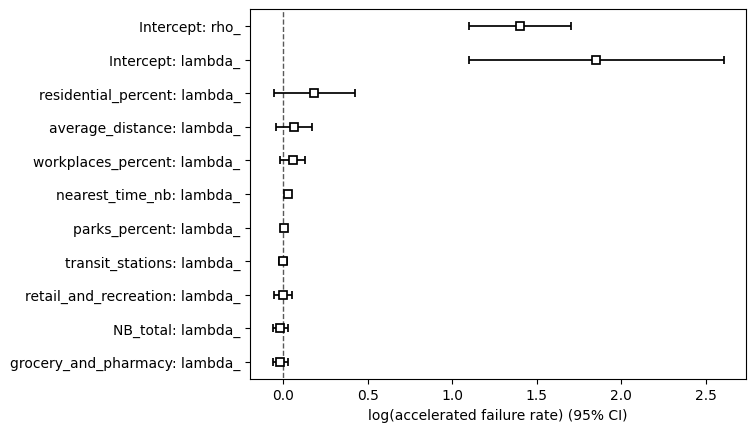

In [ ]:
surv_tda = data[['Day-D','average_distance','nearest_time_nb','NB_total','retail_and_recreation', 'grocery_and_pharmacy', 'parks_percent', 'transit_stations',
       'workplaces_percent', 'residential_percent']]
aft_weibull_tda = WeibullAFTFitter()
aft_weibull_tda.fit(surv_tda, duration_col='Day-D')
aft_weibull_tda.print_summary()
aft_weibull_tda.plot()

<lifelines.WeibullAFTFitter: fitted with 34 total observations, 0 right-censored observations>
             duration col = 'Day-D'
   number of observations = 34
number of events observed = 34
           log-likelihood = -110.05
         time fit was run = 2024-07-30 19:40:05 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                     
lambda_ grocery_and_pharmacy    0.01       1.01       0.02            -0.03             0.05                 0.98                 1.05
        parks_percent          -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
        residential_percent     0.22       1.25       0.13            -0.04             0.48                 0.96                 1.62
        retail_and_recreation  -0.01       0.99       0.03            -0.06             0.04                 0.94                 1.04
        transit_stations        0.01       1.01       0.01            -0.02             0.03                 0.98                 1.04
        workplaces_percent      0.05       1.05       0.04            -0.03             0.13                 0.97                 1.13
        Intercept               2.32      10.15       0.29             1.74             2.89                 5.70                18.08
rho_    Intercept               1.29       3.64       0.16             0.98             1.60                 2.67                 4.95

                                cmp to     z      p   -log2(p)
param   covariate                                             
lambda_ grocery_and_pharmacy      0.00  0.67   0.50       1.00
        parks_percent             0.00 -0.07   0.95       0.08
        residential_percent       0.00  1.67   0.10       3.39
        retail_and_recreation     0.00 -0.43   0.67       0.58
        transit_stations          0.00  0.54   0.59       0.76
        workplaces_percent        0.00  1.20   0.23       2.12
        Intercept                 0.00  7.86 <0.005      47.93
rho_    Intercept                 0.00  8.21 <0.005      52.06
---
Concordance = 0.91
AIC = 236.10
log-likelihood ratio test = 27.48 on 6 df
-log2(p) of ll-ratio test = 13.05

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

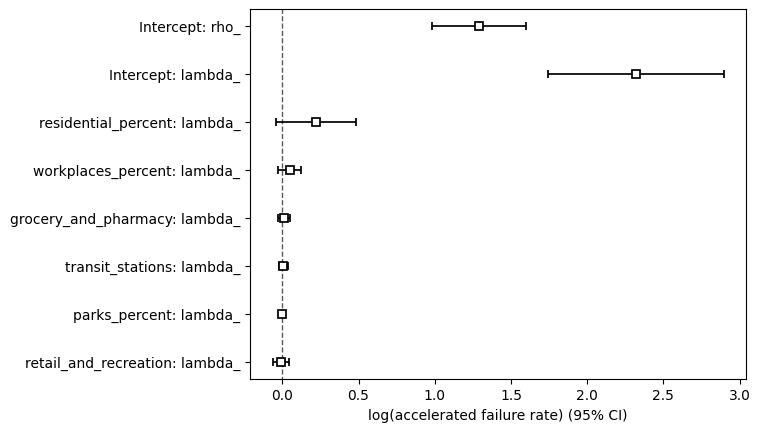

In [ ]:
surv_nontda = data[['Day-D','retail_and_recreation', 'grocery_and_pharmacy', 'parks_percent', 'transit_stations',
       'workplaces_percent', 'residential_percent']]
aft_weibull = WeibullAFTFitter()
aft_weibull.fit(surv_nontda, duration_col='Day-D')
aft_weibull.print_summary()
aft_weibull.plot()

<lifelines.LogLogisticAFTFitter: fitted with 34 total observations, 0 right-censored observations>
             duration col = 'Day-D'
   number of observations = 34
number of events observed = 34
           log-likelihood = -114.00
         time fit was run = 2024-07-30 19:40:12 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
alpha_ NB_total               -0.02       0.98       0.03            -0.08             0.03                 0.92                 1.04
       average_distance        0.05       1.05       0.06            -0.06             0.16                 0.94                 1.18
       grocery_and_pharmacy   -0.01       0.99       0.03            -0.08             0.05                 0.92                 1.05
       nearest_time_nb         0.03       1.03       0.01             0.01             0.06                 1.01                 1.06
       parks_percent          -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
       residential_percent     0.24       1.27       0.13            -0.01             0.49                 0.99                 1.63
       retail_and_recreation   0.00       1.00       0.03            -0.05             0.06                 0.95                 1.06
       transit_stations       -0.00       1.00       0.01            -0.03             0.02                 0.97                 1.02
       workplaces_percent      0.08       1.08       0.04            -0.00             0.15                 1.00                 1.17
       Intercept               1.62       5.07       0.40             0.84             2.40                 2.32                11.05
beta_  Intercept               1.56       4.75       0.16             1.25             1.87                 3.49                 6.47

                               cmp to     z      p   -log2(p)
param  covariate                                             
alpha_ NB_total                  0.00 -0.81   0.42       1.25
       average_distance          0.00  0.89   0.38       1.41
       grocery_and_pharmacy      0.00 -0.45   0.65       0.61
       nearest_time_nb           0.00  2.81 <0.005       7.64
       parks_percent             0.00 -0.11   0.91       0.13
       residential_percent       0.00  1.90   0.06       4.13
       retail_and_recreation     0.00  0.16   0.87       0.19
       transit_stations          0.00 -0.20   0.85       0.24
       workplaces_percent        0.00  1.90   0.06       4.12
       Intercept                 0.00  4.08 <0.005      14.45
beta_  Intercept                 0.00  9.90 <0.005      74.42
---
Concordance = 0.90
AIC = 249.99
log-likelihood ratio test = 30.98 on 9 df
-log2(p) of ll-ratio test = 11.71

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

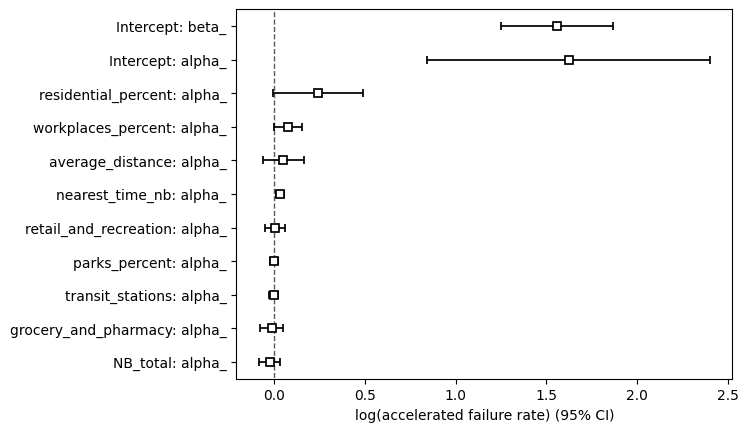

In [ ]:
aft_loglogistic_tda = LogLogisticAFTFitter()
aft_loglogistic_tda.fit(surv_tda, duration_col='Day-D')
aft_loglogistic_tda.print_summary()
aft_loglogistic_tda.plot()

<lifelines.LogLogisticAFTFitter: fitted with 34 total observations, 0 right-censored observations>
             duration col = 'Day-D'
   number of observations = 34
number of events observed = 34
           log-likelihood = -117.69
         time fit was run = 2024-07-30 19:40:13 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
alpha_ grocery_and_pharmacy    0.02       1.02       0.03            -0.03             0.08                 0.97                 1.09
       parks_percent          -0.01       0.99       0.01            -0.04             0.01                 0.96                 1.01
       residential_percent     0.33       1.39       0.14             0.06             0.60                 1.06                 1.83
       retail_and_recreation  -0.00       1.00       0.03            -0.06             0.06                 0.94                 1.06
       transit_stations        0.00       1.00       0.01            -0.03             0.03                 0.97                 1.03
       workplaces_percent      0.08       1.08       0.04            -0.00             0.16                 1.00                 1.17
       Intercept               1.85       6.38       0.35             1.18             2.53                 3.24                12.58
beta_  Intercept               1.43       4.18       0.15             1.13             1.73                 3.08                 5.66

                               cmp to     z      p   -log2(p)
param  covariate                                             
alpha_ grocery_and_pharmacy      0.00  0.84   0.40       1.31
       parks_percent             0.00 -0.82   0.41       1.28
       residential_percent       0.00  2.39   0.02       5.87
       retail_and_recreation     0.00 -0.04   0.97       0.04
       transit_stations          0.00  0.14   0.89       0.17
       workplaces_percent        0.00  1.86   0.06       3.98
       Intercept                 0.00  5.36 <0.005      23.49
beta_  Intercept                 0.00  9.22 <0.005      64.91
---
Concordance = 0.88
AIC = 251.37
log-likelihood ratio test = 23.60 on 6 df
-log2(p) of ll-ratio test = 10.66

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

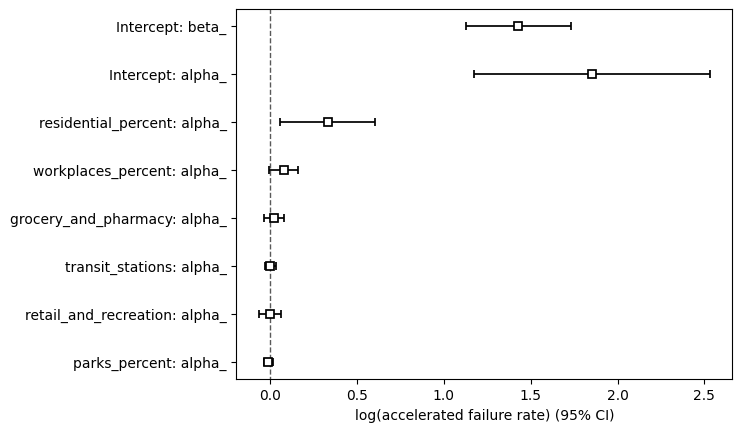

In [ ]:
aft_loglogistic = LogLogisticAFTFitter()
aft_loglogistic.fit(surv_nontda, duration_col='Day-D')
aft_loglogistic.print_summary()
aft_loglogistic.plot()

<lifelines.LogNormalAFTFitter: fitted with 34 total observations, 0 right-censored observations>
             duration col = 'Day-D'
   number of observations = 34
number of events observed = 34
           log-likelihood = -120.23
         time fit was run = 2024-07-30 19:40:13 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    NB_total               -0.06       0.94       0.05            -0.16             0.03                 0.85                 1.03
       average_distance       -0.08       0.93       0.09            -0.25             0.10                 0.78                 1.10
       grocery_and_pharmacy   -0.06       0.94       0.05            -0.16             0.03                 0.85                 1.03
       nearest_time_nb         0.05       1.05       0.02             0.01             0.08                 1.01                 1.08
       parks_percent          -0.01       0.99       0.02            -0.05             0.03                 0.96                 1.03
       residential_percent     0.44       1.55       0.21             0.03             0.84                 1.03                 2.32
       retail_and_recreation   0.03       1.03       0.05            -0.07             0.12                 0.93                 1.13
       transit_stations       -0.02       0.98       0.02            -0.06             0.02                 0.94                 1.02
       workplaces_percent      0.17       1.19       0.06             0.05             0.29                 1.05                 1.34
       Intercept               1.58       4.87       0.65             0.31             2.85                 1.37                17.34
sigma_ Intercept              -0.65       0.52       0.12            -0.89            -0.41                 0.41                 0.66

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    NB_total                  0.00 -1.32   0.19       2.41
       average_distance          0.00 -0.87   0.38       1.39
       grocery_and_pharmacy      0.00 -1.35   0.18       2.50
       nearest_time_nb           0.00  2.56   0.01       6.59
       parks_percent             0.00 -0.53   0.60       0.74
       residential_percent       0.00  2.12   0.03       4.88
       retail_and_recreation     0.00  0.53   0.59       0.75
       transit_stations          0.00 -0.82   0.41       1.28
       workplaces_percent        0.00  2.83 <0.005       7.75
       Intercept                 0.00  2.44   0.01       6.10
sigma_ Intercept                 0.00 -5.37 <0.005      23.57
---
Concordance = 0.85
AIC = 262.46
log-likelihood ratio test = 29.38 on 9 df
-log2(p) of ll-ratio test = 10.80

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

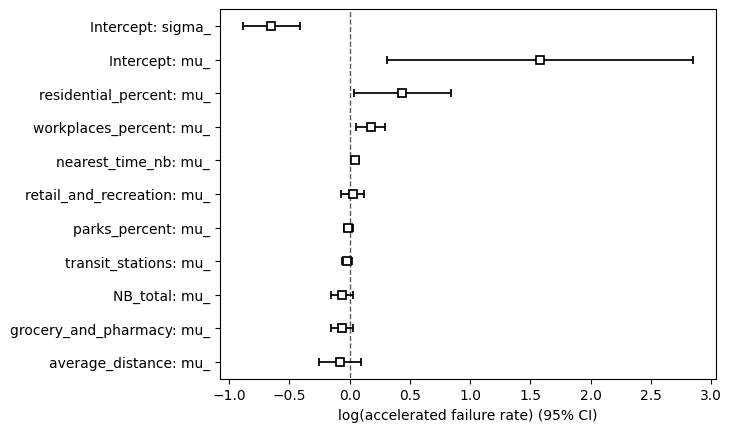

In [ ]:
aft_lognormal_tda = LogNormalAFTFitter()
aft_lognormal_tda.fit(surv_tda, duration_col='Day-D')
aft_lognormal_tda.print_summary()
aft_lognormal_tda.plot()

<lifelines.LogNormalAFTFitter: fitted with 34 total observations, 0 right-censored observations>
             duration col = 'Day-D'
   number of observations = 34
number of events observed = 34
           log-likelihood = -124.27
         time fit was run = 2024-07-30 19:40:14 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    grocery_and_pharmacy    0.01       1.01       0.04            -0.07             0.10                 0.93                 1.11
       parks_percent          -0.02       0.98       0.02            -0.06             0.01                 0.94                 1.01
       residential_percent     0.57       1.77       0.22             0.14             1.01                 1.15                 2.73
       retail_and_recreation   0.05       1.05       0.05            -0.05             0.15                 0.95                 1.16
       transit_stations       -0.02       0.98       0.02            -0.07             0.02                 0.93                 1.02
       workplaces_percent      0.15       1.16       0.07             0.02             0.28                 1.02                 1.33
       Intercept               1.05       2.85       0.50             0.07             2.03                 1.07                 7.58
sigma_ Intercept              -0.53       0.59       0.12            -0.77            -0.29                 0.46                 0.75

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    grocery_and_pharmacy      0.00  0.31   0.76       0.40
       parks_percent             0.00 -1.28   0.20       2.32
       residential_percent       0.00  2.57   0.01       6.63
       retail_and_recreation     0.00  0.92   0.36       1.48
       transit_stations          0.00 -1.08   0.28       1.84
       workplaces_percent        0.00  2.30   0.02       5.54
       Intercept                 0.00  2.10   0.04       4.81
sigma_ Intercept                 0.00 -4.39 <0.005      16.41
---
Concordance = 0.82
AIC = 264.53
log-likelihood ratio test = 21.31 on 6 df
-log2(p) of ll-ratio test = 9.27

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

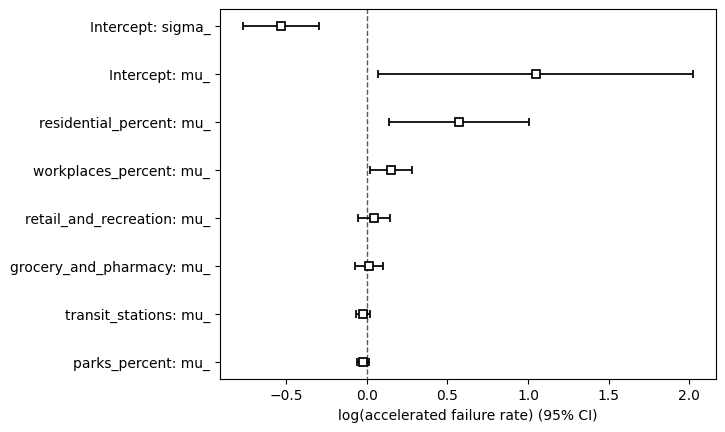

In [ ]:
aft_lognormal = LogNormalAFTFitter()
aft_lognormal.fit(surv_nontda, duration_col='Day-D')
aft_lognormal.print_summary()
aft_lognormal.plot()

In [ ]:
feature_names1 = ['average_distance','nearest_time_nb','NB_total','retail_and_recreation', 'grocery_and_pharmacy', 'parks_percent', 'transit_stations',
       'workplaces_percent', 'residential_percent']
feature_names2 = ['retail_and_recreation', 'grocery_and_pharmacy', 'parks_percent', 'transit_stations',
       'workplaces_percent', 'residential_percent']
X_1 = data[feature_names1]
X_2 = data[feature_names2]
#Y_ = data[['Day-D', 'event']]

dt = [('cens', '?'), ('time', '<f8')]
yy = []
for a in data['Day-D']:
  yy.append((True, a))

Y_ = np. array(yy, dtype=dt)
Y_

array([( True,  1.), ( True,  1.), ( True,  7.), ( True,  7.),
       ( True,  9.), ( True,  9.), ( True, 12.), ( True, 13.),
       ( True, 16.), ( True, 16.), ( True, 17.), ( True, 17.),
       ( True, 17.), ( True, 17.), ( True, 18.), ( True, 18.),
       ( True, 19.), ( True, 21.), ( True, 21.), ( True, 21.),
       ( True, 22.), ( True, 22.), ( True, 23.), ( True, 23.),
       ( True, 25.), ( True, 25.), ( True, 25.), ( True, 26.),
       ( True, 27.), ( True, 28.), ( True, 29.), ( True, 30.),
       ( True, 38.), ( True, 38.)], dtype=[('cens', '?'), ('time', '<f8')])

In [ ]:
random_state = 30
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_1, Y_, test_size=0.2, random_state=random_state)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_2, Y_, test_size=0.2, random_state=random_state)

In [ ]:
rsf_regtda = RandomSurvivalForest(n_estimators=10,
                           min_samples_leaf=2,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state)
rsf_regtda.fit(X_train1, Y_train1)
ctda1 = rsf_regtda.score(X_test1, Y_test1)
print("C-Index = ", ctda1)


result = permutation_importance(rsf_regtda, X_test1, Y_test1, n_repeats=25, random_state=random_state)
df_result = pd.DataFrame({k: result[k] for k in (
            "importances_mean",
            "importances_std",)},
    index=X_test1.columns,).sort_values(by="importances_mean", ascending=False)

df_result

C-Index =  0.9523809523809523


,importances_mean,importances_std
residential_percent,0.180952,0.095238
retail_and_recreation,0.106667,0.074724
nearest_time_nb,0.087619,0.068253
grocery_and_pharmacy,0.036190,0.045236
workplaces_percent,0.036190,0.033752
transit_stations,0.020952,0.027205
average_distance,0.000000,0.000000
NB_total,0.000000,0.000000
parks_percent,0.000000,0.000000


In [ ]:
rsf_regnontda = RandomSurvivalForest(n_estimators=10,
                           min_samples_leaf=2,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state)
rsf_regnontda.fit(X_train2, Y_train2)
cnontda1 = rsf_regnontda.score(X_test2, Y_test2)
print("C-Index = ", cnontda1)

result = permutation_importance(rsf_regnontda, X_test2, Y_test2, n_repeats=25, random_state=random_state)
df_result = pd.DataFrame({k: result[k] for k in (
            "importances_mean",
            "importances_std",)},
    index=X_test2.columns,).sort_values(by="importances_mean", ascending=False)

df_result

C-Index =  0.8095238095238095


,importances_mean,importances_std
retail_and_recreation,0.112381,0.090230
grocery_and_pharmacy,0.003810,0.029875
residential_percent,-0.005714,0.081171
workplaces_percent,-0.036190,0.052649
transit_stations,-0.043810,0.048412
parks_percent,-0.062857,0.039773


In [ ]:
rsf_regtda2 = RandomSurvivalForest(n_estimators=20,
                           min_samples_leaf=5,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state)
rsf_regtda2.fit(X_train1, Y_train1)
ctda2 = rsf_regtda2.score(X_test1, Y_test1)
print("C-Index = ", ctda2)

result = permutation_importance(rsf_regtda2, X_test1, Y_test1, n_repeats=25, random_state=random_state)
df_result = pd.DataFrame({k: result[k] for k in (
            "importances_mean",
            "importances_std",)},
    index=X_test1.columns,).sort_values(by="importances_mean", ascending=False)

df_result

C-Index =  0.9285714285714286


,importances_mean,importances_std
residential_percent,0.120000,0.082610
nearest_time_nb,0.107619,0.077113
retail_and_recreation,0.100000,0.064594
workplaces_percent,0.025714,0.044119
transit_stations,0.020952,0.046812
average_distance,0.000952,0.017143
NB_total,0.000000,0.000000
parks_percent,-0.003810,0.018663
grocery_and_pharmacy,-0.007619,0.039106


In [ ]:
rsf_regnontda2 = RandomSurvivalForest(n_estimators=20,
                           min_samples_leaf=5,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state)
rsf_regnontda2.fit(X_train2, Y_train2)
cnontda2 = rsf_regnontda2.score(X_test2, Y_test2)
print("C-Index = ", cnontda2)

result = permutation_importance(rsf_regnontda2, X_test2, Y_test2, n_repeats=25, random_state=random_state)
df_result = pd.DataFrame({k: result[k] for k in (
            "importances_mean",
            "importances_std",)},
    index=X_test2.columns,).sort_values(by="importances_mean", ascending=False)

df_result

C-Index =  0.7857142857142857


,importances_mean,importances_std
residential_percent,2.095238e-02,0.076582
workplaces_percent,6.666667e-03,0.028981
parks_percent,3.809524e-03,0.022008
transit_stations,4.440892e-18,0.036266
grocery_and_pharmacy,-5.714286e-03,0.037057
retail_and_recreation,-2.476190e-02,0.069164


## Survival Analysis for Longitudinal Data

In [ ]:
#Define Topological feature
point_cloud_long = []

def VR_feature(cloud, dim, metric="euclidean"):
  VR_relation = VietorisRipsPersistence(metric, homology_dimensions=dim)

  # calculate persistence diagram
  pd_relation = VR_relation.fit_transform(cloud)
  VR_relation.plot(pd_relation)
  PE = PersistenceEntropy(normalize=True)
  features = PE.fit_transform(pd_relation)
  return pd_relation, VR_relation, features

In [ ]:
#anchor = [-15, max(data_longitudinal['average_distance']), 0, 0, 0,
#             min(data_longitudinal['grocery_and_pharmacy']), max(data_longitudinal['residential_percent']),
#             min(data_longitudinal['parks_percent']), min(data_longitudinal['retail_and_recreation']),
#             min(data_longitudinal['transit_stations']), min(data_longitudinal['workplaces_percent'])]

anchor = [-15, max(data_longitudinal['average_distance']), 0, 0, 0,
             0, 0,
             0, 0,
             0, 0]

feature_cloud = []
for i in range(len(data)):
  #data_cloud = []
  data_cloud = [np.array(anchor)]
  k = i*14
  for j in range(k, (k+14)):
    point = [data_longitudinal['time'][j],
             data_longitudinal['average_distance'][j], data_longitudinal['cumulative_cov'][j],
             data_longitudinal['NB_total'][j], data_longitudinal['nearest_time_nb'][j],
             data_longitudinal['grocery_and_pharmacy'][j], data_longitudinal['residential_percent'][j],
             data_longitudinal['parks_percent'][j], data_longitudinal['retail_and_recreation'][j],
             data_longitudinal['transit_stations'][j], data_longitudinal['workplaces_percent'][j]]
    data_cloud.append(np.array(point))
  data_array_cloud = np.array([data_cloud])
  print(type(data_array_cloud))
  print(data_array_cloud.shape)
  feat = VR_feature(data_array_cloud, dim=[0], metric="euclidean")
  feature_cloud.append(feat[2])

print(len(feature_cloud))
#feature_cloud

<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 15, 11)
<class 'numpy.ndarray'>
(1, 

In [ ]:
df_long = pd.DataFrame(np.concatenate(feature_cloud), columns=['entropy'])
df_long['Day'] = data['Day-D']
df_long

,entropy,Day
0,0.478578,1
1,0.520309,1
2,0.503185,7
3,0.518826,7
4,0.491076,9
5,0.509982,9
6,0.483941,12
7,0.456712,13
8,0.450480,16
9,0.451661,16


In [ ]:
df_long1 = pd.concat([X_1, df_long],  axis=1, join="inner")
df_long1

,average_distance,nearest_time_nb,NB_total,retail_and_recreation,grocery_and_pharmacy,parks_percent,transit_stations,workplaces_percent,residential_percent,entropy,Day
0,6.950034,0,0,0.43,4.29,-0.36,3.14,2.36,0.93,0.478578,1
1,6.950034,0,0,0.00,3.00,-3.07,2.21,3.00,0.57,0.520309,1
2,0.746432,1,2,4.00,6.36,9.29,0.86,4.71,0.57,0.503185,7
3,4.080101,1,2,-0.71,1.21,-9.00,0.71,3.29,0.86,0.518826,7
4,4.383070,7,1,-3.79,-0.36,-10.50,-11.50,-6.50,2.50,0.491076,9
5,6.950034,0,0,-2.86,-1.57,-2.57,-10.07,6.07,0.79,0.509982,9
6,3.421138,9,5,2.14,3.50,-14.64,-18.29,4.93,0.79,0.483941,12
7,6.950034,0,0,1.71,5.64,-8.36,7.50,6.71,0.29,0.456712,13
8,3.605113,12,5,0.71,4.71,-5.29,-1.79,2.57,1.14,0.450480,16
9,5.080630,9,1,-0.50,4.93,1.36,-11.00,4.36,1.57,0.451661,16


In [ ]:
df_long.to_csv('data longtda')

In [ ]:
df_long1.to_csv('data longtda1')

### Statistics Model

<lifelines.WeibullAFTFitter: fitted with 34 total observations, 0 right-censored observations>
             duration col = 'Day'
   number of observations = 34
number of events observed = 34
           log-likelihood = -94.35
         time fit was run = 2024-07-30 19:40:54 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                     
lambda_ NB_total                0.00       1.00       0.01            -0.03             0.03                 0.97                 1.03
        average_distance        0.00       1.00       0.03            -0.06             0.07                 0.94                 1.07
        entropy                -8.54       0.00       1.39           -11.26            -5.82                 0.00                 0.00
        grocery_and_pharmacy    0.00       1.00       0.02            -0.03             0.03                 0.97                 1.03
        nearest_time_nb         0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
        parks_percent          -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00
        residential_percent     0.04       1.05       0.07            -0.10             0.19                 0.91                 1.21
        retail_and_recreation   0.01       1.01       0.02            -0.02             0.05                 0.98                 1.05
        transit_stations       -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
        workplaces_percent      0.02       1.02       0.02            -0.02             0.07                 0.98                 1.07
        Intercept               6.23     505.73       0.75             4.75             7.70               115.62              2212.03
rho_    Intercept               1.81       6.12       0.16             1.50             2.12                 4.49                 8.34

                                cmp to     z      p   -log2(p)
param   covariate                                             
lambda_ NB_total                  0.00  0.11   0.91       0.14
        average_distance          0.00  0.11   0.91       0.13
        entropy                   0.00 -6.15 <0.005      30.29
        grocery_and_pharmacy      0.00  0.17   0.87       0.20
        nearest_time_nb           0.00  0.41   0.68       0.55
        parks_percent             0.00 -1.28   0.20       2.31
        residential_percent       0.00  0.62   0.54       0.90
        retail_and_recreation     0.00  0.87   0.39       1.37
        transit_stations          0.00 -1.07   0.29       1.81
        workplaces_percent        0.00  1.15   0.25       2.01
        Intercept                 0.00  8.27 <0.005      52.72
rho_    Intercept                 0.00 11.46 <0.005      98.61
---
Concordance = 0.96
AIC = 212.71
log-likelihood ratio test = 58.88 on 10 df
-log2(p) of ll-ratio test = 27.33

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

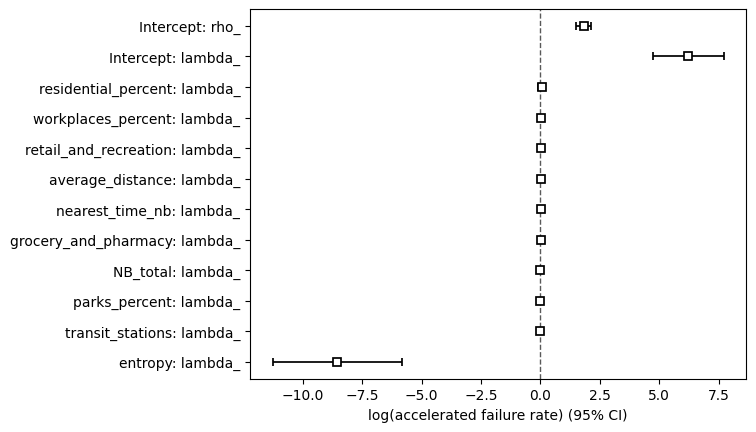

In [ ]:
aft_weibull_join_long = WeibullAFTFitter()
aft_weibull_join_long.fit(df_long1, duration_col='Day')
aft_weibull_join_long.print_summary()
aft_weibull_join_long.plot()

<lifelines.WeibullAFTFitter: fitted with 34 total observations, 0 right-censored observations>
             duration col = 'Day'
   number of observations = 34
number of events observed = 34
           log-likelihood = -97.06
         time fit was run = 2024-07-30 19:40:55 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ entropy    -7.56       0.00       0.65            -8.84            -6.28                 0.00                 0.00
        Intercept   6.04     421.68       0.27             5.51             6.58               247.63               718.06
rho_    Intercept   1.74       5.68       0.16             1.43             2.05                 4.17                 7.75

                    cmp to      z      p   -log2(p)
param   covariate                                  
lambda_ entropy       0.00 -11.57 <0.005     100.44
        Intercept     0.00  22.26 <0.005     362.08
rho_    Intercept     0.00  10.98 <0.005      90.79
---
Concordance = 0.98
AIC = 200.13
log-likelihood ratio test = 53.46 on 1 df
-log2(p) of ll-ratio test = 41.78

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

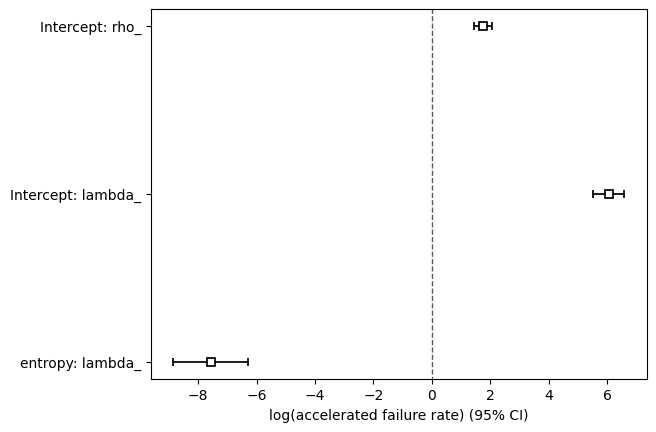

In [ ]:
aft_weibull_tda_long = WeibullAFTFitter()
aft_weibull_tda_long.fit(df_long, duration_col='Day')
aft_weibull_tda_long.print_summary()
aft_weibull_tda_long.plot()

<lifelines.LogLogisticAFTFitter: fitted with 34 total observations, 0 right-censored observations>
             duration col = 'Day'
   number of observations = 34
number of events observed = 34
           log-likelihood = -103.61
         time fit was run = 2024-07-30 19:40:56 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
alpha_ NB_total               -0.01       0.99       0.02            -0.05             0.03                 0.96                 1.04
       average_distance       -0.02       0.98       0.04            -0.11             0.06                 0.89                 1.07
       entropy                -9.32       0.00       1.79           -12.82            -5.82                 0.00                 0.00
       grocery_and_pharmacy   -0.01       0.99       0.02            -0.05             0.03                 0.95                 1.03
       nearest_time_nb         0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
       parks_percent          -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
       residential_percent     0.03       1.04       0.10            -0.15             0.22                 0.86                 1.25
       retail_and_recreation   0.02       1.02       0.02            -0.02             0.06                 0.98                 1.06
       transit_stations       -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
       workplaces_percent      0.03       1.03       0.03            -0.03             0.09                 0.97                 1.09
       Intercept               6.68     792.49       1.00             4.71             8.64               110.90              5662.82
beta_  Intercept               1.91       6.78       0.16             1.59             2.24                 4.92                 9.35

                               cmp to     z      p   -log2(p)
param  covariate                                             
alpha_ NB_total                  0.00 -0.27   0.79       0.34
       average_distance          0.00 -0.52   0.60       0.74
       entropy                   0.00 -5.22 <0.005      22.38
       grocery_and_pharmacy      0.00 -0.46   0.64       0.64
       nearest_time_nb           0.00  0.43   0.67       0.58
       parks_percent             0.00 -1.27   0.20       2.30
       residential_percent       0.00  0.36   0.72       0.48
       retail_and_recreation     0.00  0.82   0.41       1.29
       transit_stations          0.00 -1.19   0.23       2.09
       workplaces_percent        0.00  1.06   0.29       1.80
       Intercept                 0.00  6.65 <0.005      35.02
beta_  Intercept                 0.00 11.68 <0.005     102.21
---
Concordance = 0.94
AIC = 231.23
log-likelihood ratio test = 51.75 on 10 df
-log2(p) of ll-ratio test = 22.91

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

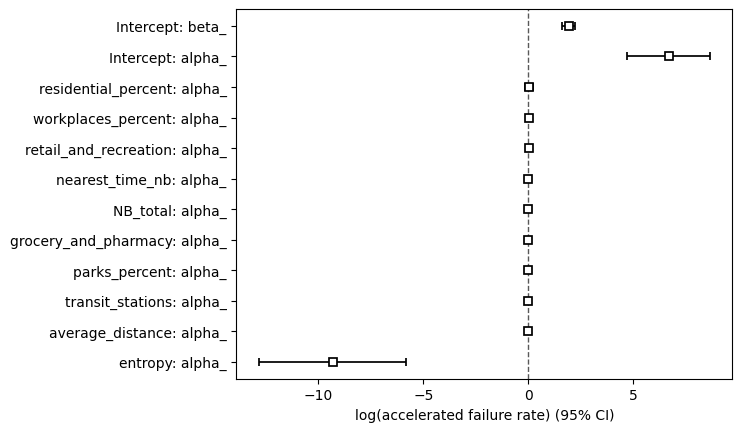

In [ ]:
aft_loglogistic_join_long = LogLogisticAFTFitter()
aft_loglogistic_join_long.fit(df_long1, duration_col='Day')
aft_loglogistic_join_long.print_summary()
aft_loglogistic_join_long.plot()

<lifelines.LogLogisticAFTFitter: fitted with 34 total observations, 0 right-censored observations>
             duration col = 'Day'
   number of observations = 34
number of events observed = 34
           log-likelihood = -106.72
         time fit was run = 2024-07-30 19:40:57 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                         
alpha_ entropy    -8.13       0.00       0.79            -9.69            -6.58                 0.00                 0.00
       Intercept   6.24     515.40       0.32             5.61             6.88               272.61               974.41
beta_  Intercept   1.84       6.32       0.16             1.53             2.16                 4.61                 8.67

                   cmp to      z      p   -log2(p)
param  covariate                                  
alpha_ entropy       0.00 -10.26 <0.005      79.70
       Intercept     0.00  19.22 <0.005     271.01
beta_  Intercept     0.00  11.45 <0.005      98.35
---
Concordance = 0.98
AIC = 219.45
log-likelihood ratio test = 45.53 on 1 df
-log2(p) of ll-ratio test = 35.95

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

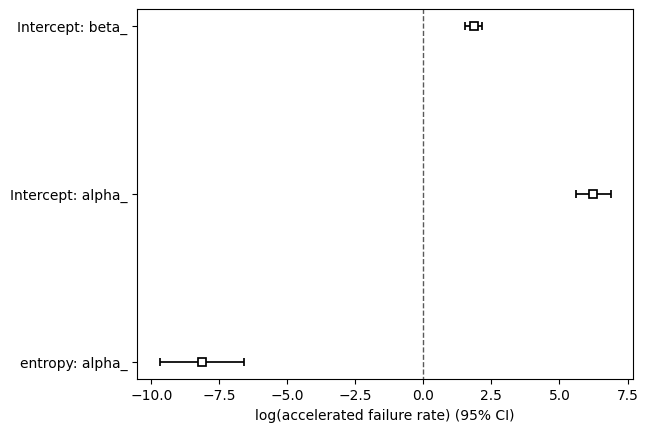

In [ ]:
aft_loglogistic_tda_long = LogLogisticAFTFitter()
aft_loglogistic_tda_long.fit(df_long, duration_col='Day')
aft_loglogistic_tda_long.print_summary()
aft_loglogistic_tda_long.plot()

<lifelines.LogNormalAFTFitter: fitted with 34 total observations, 0 right-censored observations>
             duration col = 'Day'
   number of observations = 34
number of events observed = 34
           log-likelihood = -110.77
         time fit was run = 2024-07-30 19:40:58 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    NB_total               -0.03       0.97       0.04            -0.10             0.05                 0.91                 1.05
       average_distance       -0.17       0.85       0.07            -0.30            -0.03                 0.74                 0.97
       entropy               -14.30       0.00       2.84           -19.86            -8.73                 0.00                 0.00
       grocery_and_pharmacy   -0.05       0.95       0.04            -0.12             0.02                 0.89                 1.02
       nearest_time_nb         0.00       1.00       0.02            -0.03             0.03                 0.97                 1.03
       parks_percent          -0.02       0.98       0.01            -0.05             0.01                 0.95                 1.01
       residential_percent     0.07       1.08       0.17            -0.26             0.41                 0.77                 1.51
       retail_and_recreation   0.04       1.04       0.04            -0.03             0.11                 0.97                 1.12
       transit_stations       -0.03       0.97       0.02            -0.06             0.00                 0.94                 1.00
       workplaces_percent      0.09       1.09       0.05            -0.01             0.18                 0.99                 1.20
       Intercept               9.34   11405.90       1.62             6.17            12.51               478.41             2.72e+05
sigma_ Intercept              -0.93       0.39       0.12            -1.17            -0.69                 0.31                 0.50

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    NB_total                  0.00 -0.74   0.46       1.12
       average_distance          0.00 -2.38   0.02       5.87
       entropy                   0.00 -5.03 <0.005      20.98
       grocery_and_pharmacy      0.00 -1.41   0.16       2.66
       nearest_time_nb           0.00  0.03   0.98       0.03
       parks_percent             0.00 -1.58   0.11       3.13
       residential_percent       0.00  0.42   0.67       0.57
       retail_and_recreation     0.00  1.10   0.27       1.89
       transit_stations          0.00 -1.76   0.08       3.66
       workplaces_percent        0.00  1.77   0.08       3.71
       Intercept                 0.00  5.77 <0.005      26.94
sigma_ Intercept                 0.00 -7.66 <0.005      45.62
---
Concordance = 0.88
AIC = 245.54
log-likelihood ratio test = 48.30 on 10 df
-log2(p) of ll-ratio test = 20.80

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

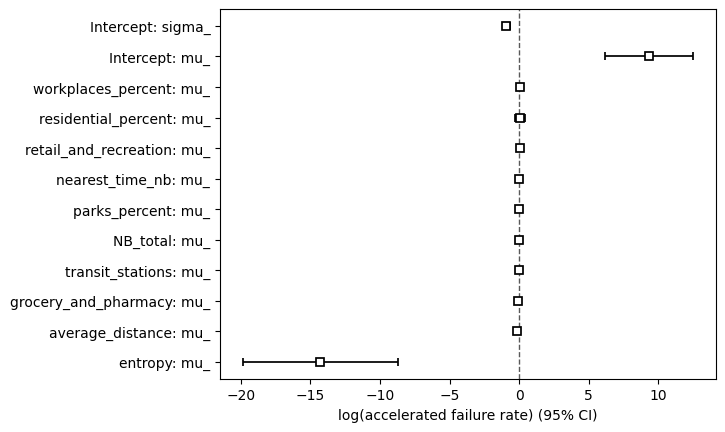

In [ ]:
aft_lognormal_join_long = LogNormalAFTFitter()
aft_lognormal_join_long.fit(df_long1, duration_col='Day')
aft_lognormal_join_long.print_summary()
aft_lognormal_join_long.plot()

<lifelines.LogNormalAFTFitter: fitted with 34 total observations, 0 right-censored observations>
             duration col = 'Day'
   number of observations = 34
number of events observed = 34
           log-likelihood = -119.20
         time fit was run = 2024-07-30 19:40:59 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                         
mu_    entropy   -10.84       0.00       1.51           -13.79            -7.89                 0.00                 0.00
       Intercept   7.26    1417.91       0.63             6.02             8.49               412.22              4877.17
sigma_ Intercept  -0.68       0.51       0.12            -0.92            -0.44                 0.40                 0.64

                   cmp to     z      p   -log2(p)
param  covariate                                 
mu_    entropy       0.00 -7.19 <0.005      40.49
       Intercept     0.00 11.51 <0.005      99.48
sigma_ Intercept     0.00 -5.62 <0.005      25.60
---
Concordance = 0.98
AIC = 244.41
log-likelihood ratio test = 31.43 on 1 df
-log2(p) of ll-ratio test = 25.53

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

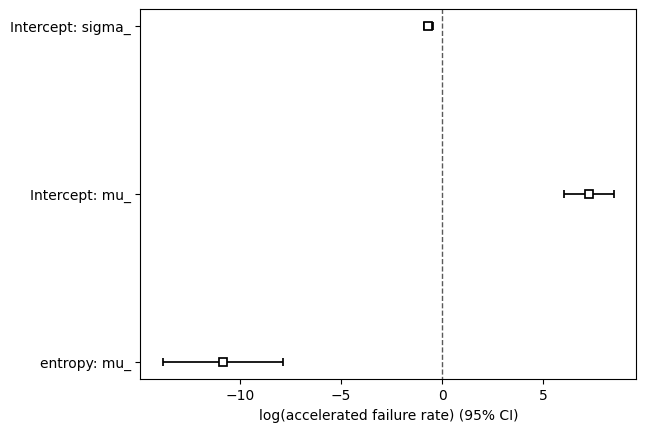

In [ ]:
aft_lognormal_tda_long = LogNormalAFTFitter()
aft_lognormal_tda_long.fit(df_long, duration_col='Day')
aft_lognormal_tda_long.print_summary()
aft_lognormal_tda_long.plot()

### Random Survival Forest

In [ ]:
X_trainlong, X_testlong, Y_trainlong, Y_testlong = train_test_split(df_long[['entropy']], Y_, test_size=0.2, random_state=random_state)

In [ ]:
rsf_long1 = RandomSurvivalForest(n_estimators=3,
                           min_samples_leaf=2,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state)
rsf_long1.fit(X_trainlong, Y_trainlong)
ctdalong1 = rsf_long1.score(X_testlong, Y_testlong)
print("C-Index = ", ctdalong1)

result = permutation_importance(rsf_long1, X_testlong, Y_testlong, n_repeats=25, random_state=random_state)
df_result = pd.DataFrame({k: result[k] for k in (
            "importances_mean",
            "importances_std",)},
    index=X_testlong.columns,).sort_values(by="importances_mean", ascending=False)

df_result

C-Index =  0.9523809523809523


,importances_mean,importances_std
entropy,0.460952,0.13584


In [ ]:
df_long1.keys()

Index(['average_distance', 'nearest_time_nb', 'NB_total',
       'retail_and_recreation', 'grocery_and_pharmacy', 'parks_percent',
       'transit_stations', 'workplaces_percent', 'residential_percent',
       'entropy', 'Day'],
      dtype='object')

In [ ]:
X_trainlong2, X_testlong2, Y_trainlong, Y_testlong = train_test_split(df_long1[['average_distance', 'nearest_time_nb', 'NB_total',
       'retail_and_recreation', 'grocery_and_pharmacy', 'parks_percent',
       'transit_stations', 'workplaces_percent', 'residential_percent',
       'entropy']], Y_, test_size=0.2,random_state=random_state)

In [ ]:
rsf_long2 = RandomSurvivalForest(n_estimators=10,
                           min_samples_leaf=2,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state)
rsf_long2.fit(X_trainlong2, Y_trainlong)
ctdalong2 = rsf_long2.score(X_testlong2, Y_testlong)
print("C-Index = ", ctdalong2)

result = permutation_importance(rsf_long2, X_testlong2, Y_testlong, n_repeats=25, random_state=random_state)
df_result = pd.DataFrame({k: result[k] for k in (
            "importances_mean",
            "importances_std",)},
    index=X_testlong2.columns,).sort_values(by="importances_mean", ascending=False)

df_result

C-Index =  0.8571428571428571


,importances_mean,importances_std
residential_percent,0.013333,0.065320
entropy,0.007619,0.068253
average_distance,0.000000,0.000000
NB_total,0.000000,0.000000
grocery_and_pharmacy,0.000000,0.000000
nearest_time_nb,-0.019048,0.023328
transit_stations,-0.026667,0.033211
workplaces_percent,-0.036190,0.041030
retail_and_recreation,-0.043810,0.068571
parks_percent,-0.047619,0.023328


In [ ]:
rsf_long3 = RandomSurvivalForest(n_estimators=20,
                           min_samples_leaf=5,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state)
rsf_long3.fit(X_trainlong2, Y_trainlong)
ctdalong3 = rsf_long3.score(X_testlong2, Y_testlong)
print("C-Index = ", ctdalong3)

result = permutation_importance(rsf_long3, X_testlong2, Y_testlong, n_repeats=25, random_state=random_state)
df_result = pd.DataFrame({k: result[k] for k in (
            "importances_mean",
            "importances_std",)},
    index=X_testlong2.columns,).sort_values(by="importances_mean", ascending=False)

df_result

C-Index =  0.9523809523809523


,importances_mean,importances_std
entropy,0.150476,0.080452
residential_percent,0.060952,0.043685
nearest_time_nb,0.057143,0.071270
retail_and_recreation,0.053333,0.031066
parks_percent,0.024762,0.008193
transit_stations,0.019048,0.023328
grocery_and_pharmacy,0.019048,0.040406
workplaces_percent,0.019048,0.040406
average_distance,0.000000,0.000000
NB_total,0.000000,0.000000
